In [1]:
import pandas as pd



In [6]:
ferp_path = '../data/geoforest/ferp/doi_10_5061_dryad_6q573n64s__v20240129/FERP123merged_20231029.csv'

# Load the dataset
df = pd.read_csv(ferp_path)

# Overview
print(df.shape)
print(df.columns)

(51016, 34)
Index(['quadrat', 'tag', 'stemtag', 'stemtag1', 'code6', 'east_m', 'north_m',
       'east_UTM', 'north_UTM', 'dsh1_mm', 'dsh2_mm', 'dsh3_mm', 'dsh1m_mm',
       'date1', 'date2', 'date3', 'status1', 'condition1', 'status2',
       'condition2', 'status3', 'condition3', 'first_census', 'irreg_dsh',
       'hom_m', 'multi1', 'stems1', 'multi2', 'multi3', 'basalarea1_m2',
       'code6fix', 'locfix', 'notes2', 'notes3'],
      dtype='object')


/var/folders/qx/bpj16cl90cq20swjd4j79cdh0000gn/T/ipykernel_86389/2680474996.py:4: DtypeWarning: Columns (13,16,17,23,25,27,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ferp_path)


In [8]:
df

,quadrat,tag,stemtag,stemtag1,code6,east_m,north_m,east_UTM,north_UTM,dsh1_mm,...,hom_m,multi1,stems1,multi2,multi3,basalarea1_m2,code6fix,locfix,notes2,notes3
0,E000_N000,2,1.0,NaN,QUERPA,2.6,6.7,582309.51,4096655.62,31.0,...,1.3,NaN,1.0,NaN,NaN,0.000755,NaN,loc_fixed,NaN,Tag 2 was not on the original data sheet even ...
1,E000_N000,3,1.0,NaN,PSEUME,0.6,6.2,582307.45,4096655.65,378.0,...,1.3,NaN,1.0,NaN,NaN,0.112221,NaN,NaN,NaN,NaN
2,E000_N000,4,1.0,NaN,QUERPA,0.5,6.8,582307.51,4096656.25,20.0,...,1.3,NaN,1.0,NaN,NaN,0.000314,NaN,NaN,NaN,NaN
3,E000_N000,5,1.0,NaN,SEQUSE,3.1,13.7,582311.77,4096662.27,1420.0,...,1.3,NaN,1.0,NaN,NaN,1.583677,NaN,NaN,NaN,NaN
4,E000_N000,6,1.0,NaN,QUERPA,4.7,19.2,582314.71,4096667.18,74.0,...,1.3,NaN,1.0,multi2,NaN,0.004301,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51011,E280_N320,34371,1.0,NaN,PSEUME,298.7,327.6,582677.22,4096891.09,NaN,...,1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51012,E280_N300,34694,1.0,NaN,QUERPA,299.4,303.4,582671.76,4096867.51,NaN,...,1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51013,E320_N360,35287,1.0,NaN,SEQUSE,339.6,374.8,582728.73,4096926.40,NaN,...,1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51014,E340_N040,36362,1.0,NaN,LITHDE,346.7,42.6,582651.49,4096603.23,NaN,...,1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


code6
LITHDE    11994
PSEUME     9422
QUERPA     8480
VACCOV     4739
CORYCO     4545
SEQUSE     3247
QUERAG     2006
TOXIDI     1718
ARBUME     1451
RHAMCA     1109
RHODOC      643
LONIHI      632
HETEAR      228
COTOPA      141
MORECA      120
ARCTCR      110
COTOFR      109
BACCPI       88
ARCTAN       59
ILEXAQ       47
PINUPO       23
UMBECA       23
HEDEHE       20
ACERMA       13
SALILA       12
SAMBNI       10
EUCAGL        8
RIBEDI        6
CEANTH        4
PINUAT        4
PYRAAN        2
CRATMO        1
ADENFA        1
ERIOJA        1
Name: count, dtype: int64


<Axes: title={'center': 'Top 10 Most Common Species'}, xlabel='code6'>

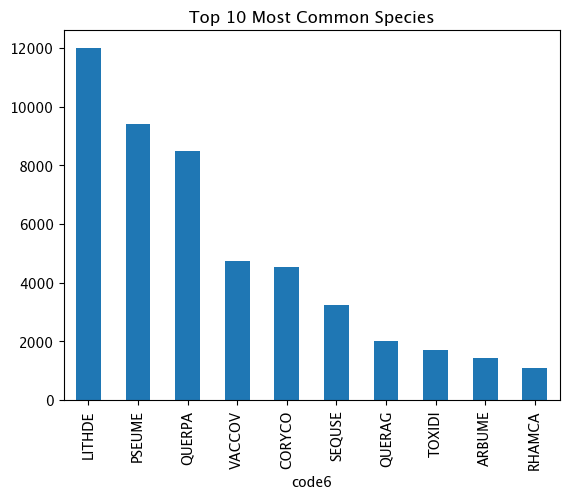

In [9]:
# Species count
species_counts = df['code6'].value_counts()
print(species_counts)

# Top 10 species
species_counts.head(10).plot(kind='bar', title='Top 10 Most Common Species')


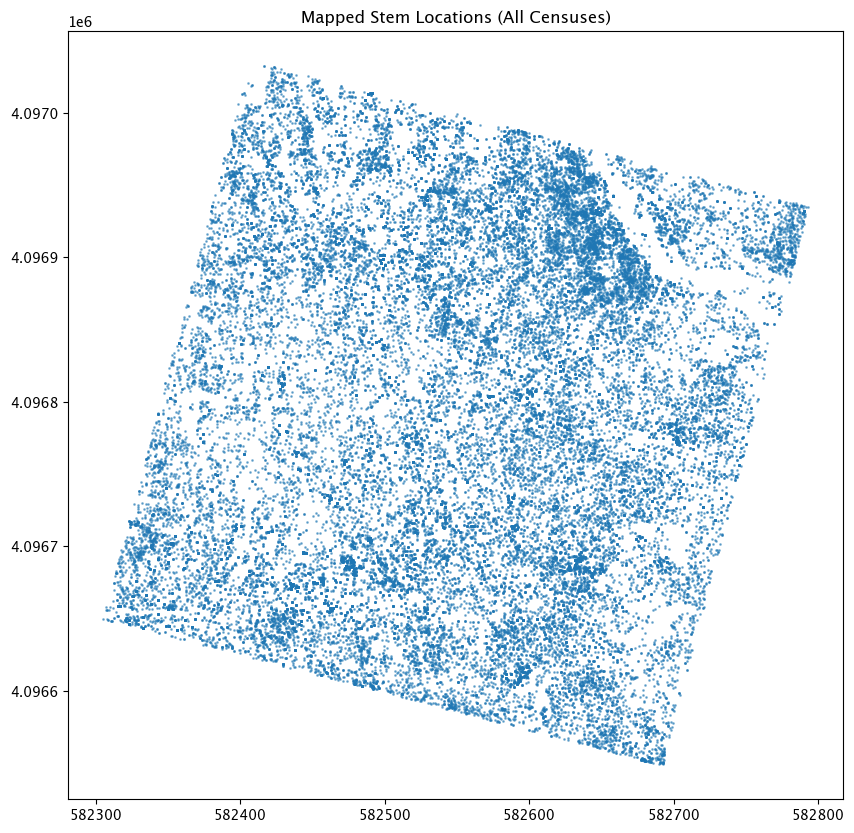

In [11]:
import geopandas as gpd
from shapely.geometry import Point

# Create GeoDataFrame
df_geo = df.dropna(subset=["east_UTM", "north_UTM"]).copy()
gdf = gpd.GeoDataFrame(
    df_geo,
    geometry=gpd.points_from_xy(df_geo["east_UTM"], df_geo["north_UTM"]),
    crs="EPSG:32610"  # UTM Zone 10N
)

# Plot spatial distribution
gdf.plot(figsize=(10, 10), markersize=1, alpha=0.5)
plt.title("Mapped Stem Locations (All Censuses)")
plt.show()


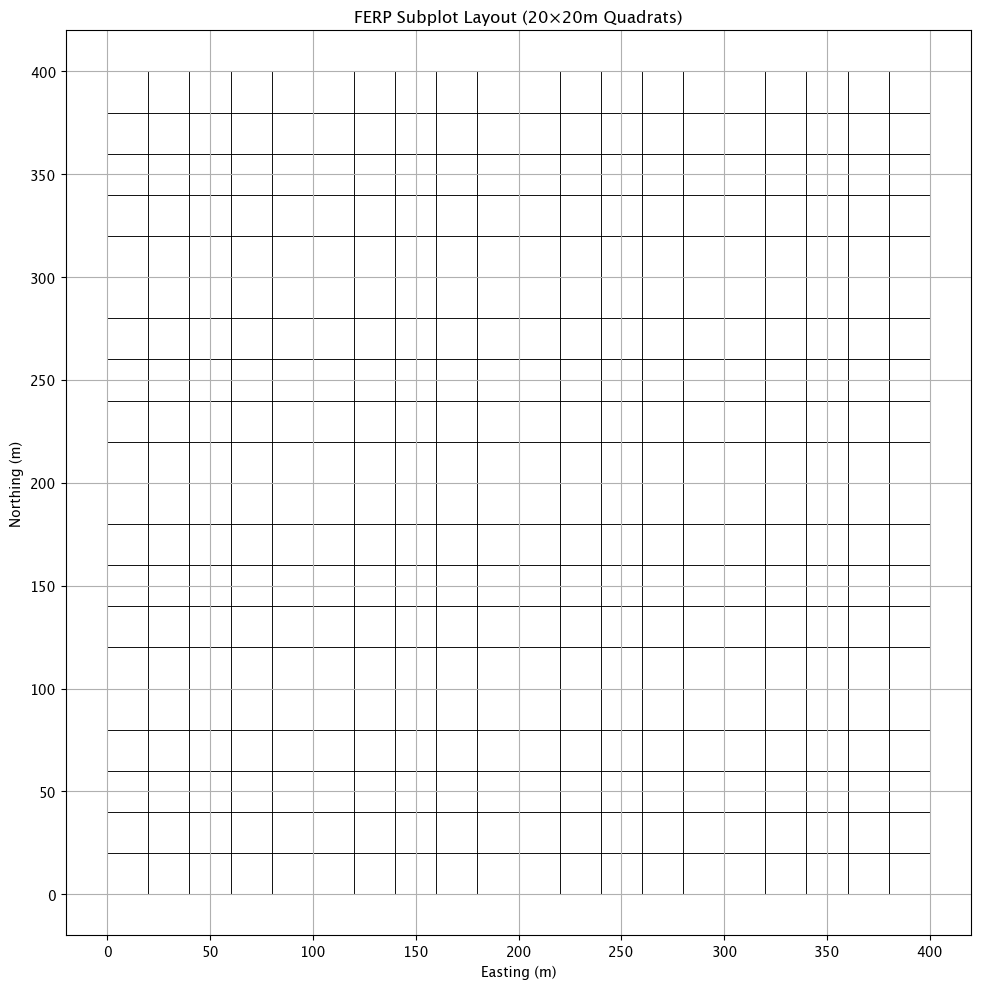

In [13]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box


# Drop NA quadrats
df_q = df.dropna(subset=["quadrat"])

# Parse quadrat into numeric east/north
def parse_quadrat(q):
    parts = q.replace("E", "").split("_N")
    return int(parts[0]), int(parts[1])

df_q["east_quadrat"], df_q["north_quadrat"] = zip(*df_q["quadrat"].map(parse_quadrat))

# Remove duplicates to get unique subplots
unique_quads = df_q[["east_quadrat", "north_quadrat"]].drop_duplicates()

# Build quadrat polygons
quad_gdf = gpd.GeoDataFrame(
    unique_quads,
    geometry=[
        box(e, n, e + 20, n + 20)
        for e, n in zip(unique_quads["east_quadrat"], unique_quads["north_quadrat"])
    ],
    crs="EPSG:32610"  # Assuming UTM coordinates
)

# Plot the subplots
fig, ax = plt.subplots(figsize=(10, 10))
quad_gdf.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=0.5)
ax.set_title("FERP Subplot Layout (20×20 m Quadrats)")
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")
plt.grid(True)
plt.tight_layout()
plt.show()


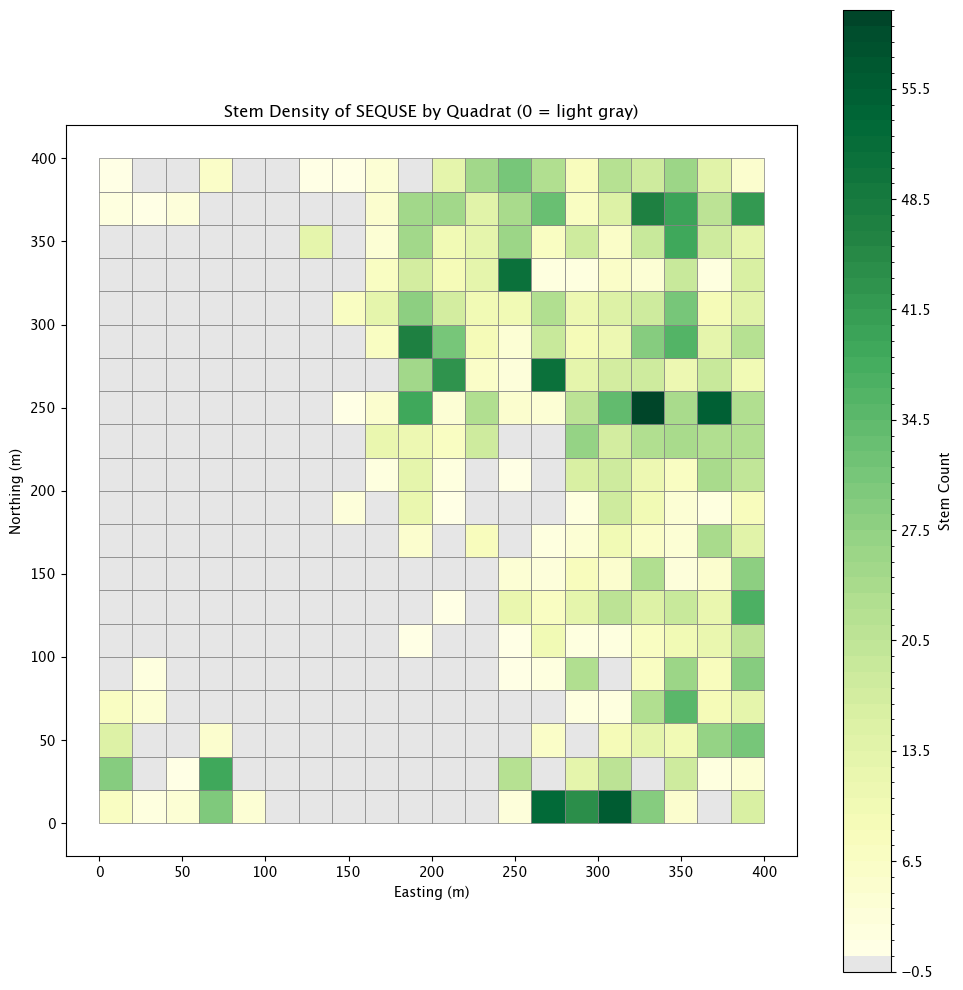

In [21]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Select species
target_species = "SEQUSE"
species_df = df[df["code6"] == target_species]

# Count per quadrat
species_density = species_df.groupby(["east_quadrat", "north_quadrat"]).size().reset_index(name="count")
gdf_density = gdf_quads.merge(species_density, on=["east_quadrat", "north_quadrat"], how="left")
gdf_density["count"] = gdf_density["count"].fillna(0).astype(int)

# Build a colormap with 0 as gray, others from YlGn
# 0: light gray, 1+: from cmap
max_val = gdf_density["count"].max()
norm_bins = np.arange(0, max_val + 2)  # +2 so upper edge is included
cmap = plt.cm.YlGn
newcolors = cmap(np.linspace(0, 1, len(norm_bins) - 1))
newcolors = np.vstack(([0.9, 0.9, 0.9, 1.0], newcolors))  # prepend light gray for 0

custom_cmap = mcolors.ListedColormap(newcolors)
norm = mcolors.BoundaryNorm(boundaries=norm_bins - 0.5, ncolors=len(norm_bins))

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
gdf_density.plot(ax=ax, column="count", cmap=custom_cmap, norm=norm, edgecolor="grey", linewidth=0.5)
ax.set_title(f"Stem Density of {target_species} by Quadrat (0 = light gray)")
ax.set_xlabel("Easting (m)")
ax.set_ylabel("Northing (m)")
sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=norm)
sm._A = []
cbar = fig.colorbar(sm, ax=ax, orientation="vertical", label="Stem Count")
plt.tight_layout()
plt.show()


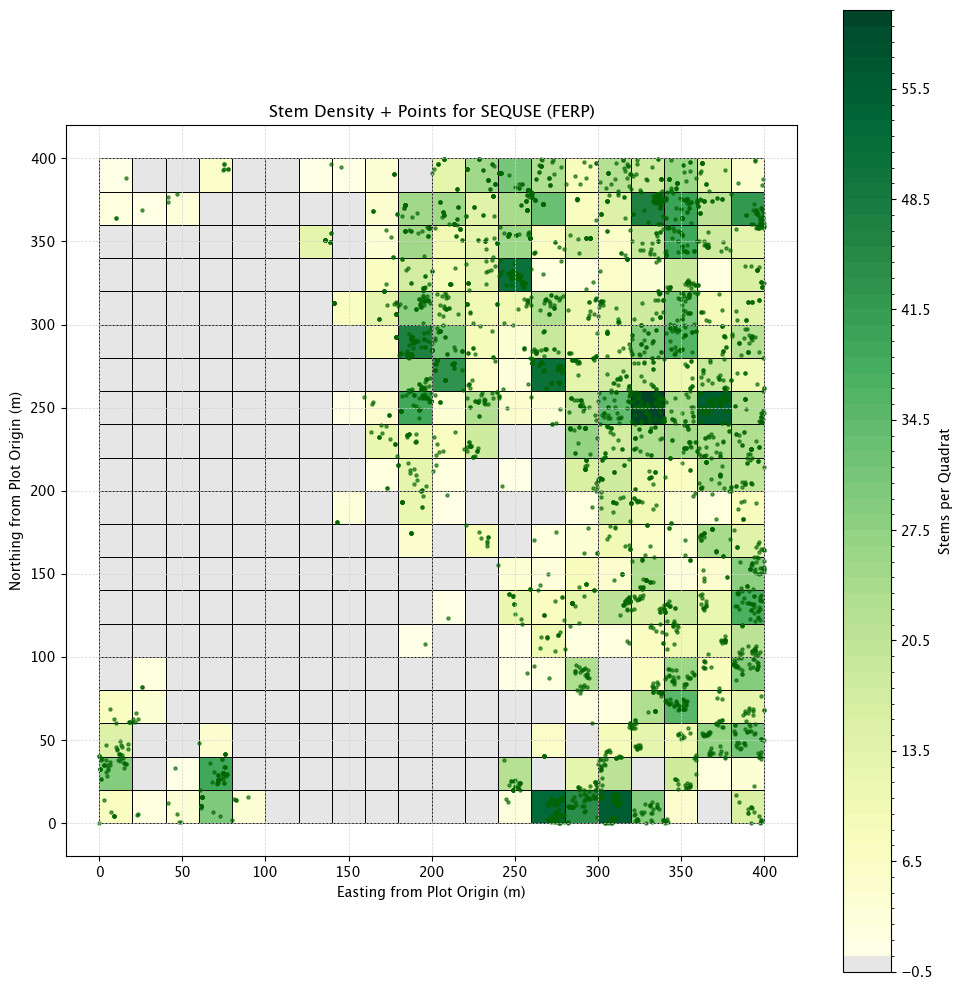

In [22]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from shapely.geometry import box

# Load and clean data
# df = pd.read_csv("ferp_stems.csv").dropna(subset=["east_m", "north_m", "quadrat"])

# Parse quadrat
def parse_quadrat(q):
    e, n = q.replace("E", "").split("_N")
    return int(e), int(n)

df["east_quadrat"], df["north_quadrat"] = zip(*df["quadrat"].map(parse_quadrat))

# Build quadrat polygons from 20×20m grid
quads = df[["east_quadrat", "north_quadrat"]].drop_duplicates()
gdf_quads = gpd.GeoDataFrame(
    quads,
    geometry=[box(e, n, e + 20, n + 20) for e, n in zip(quads["east_quadrat"], quads["north_quadrat"])],
    crs="EPSG:32610"  # Optional
)

# Select target species
target_species = "SEQUSE"
df_species = df[df["code6"] == target_species]

# Count stems per quadrat
species_density = df_species.groupby(["east_quadrat", "north_quadrat"]).size().reset_index(name="count")
gdf_density = gdf_quads.merge(species_density, on=["east_quadrat", "north_quadrat"], how="left")
gdf_density["count"] = gdf_density["count"].fillna(0).astype(int)

# Create stem GeoDataFrame from local coords
gdf_stems = gpd.GeoDataFrame(
    df_species,
    geometry=gpd.points_from_xy(df_species["east_m"], df_species["north_m"]),
    crs="EPSG:32610"  # Optional
)

# Build colormap: 0 = light gray, others from YlGn
max_val = gdf_density["count"].max()
norm_bins = np.arange(0, max_val + 2)
base_cmap = plt.cm.YlGn
newcolors = base_cmap(np.linspace(0, 1, len(norm_bins) - 1))
newcolors = np.vstack(([0.9, 0.9, 0.9, 1.0], newcolors))  # light gray for 0
custom_cmap = mcolors.ListedColormap(newcolors)
norm = mcolors.BoundaryNorm(norm_bins - 0.5, len(norm_bins))

fig, ax = plt.subplots(figsize=(10, 10))

# Plot quadrat density polygons (with solid black borders)
gdf_density.plot(
    ax=ax,
    column="count",
    cmap=custom_cmap,
    norm=norm,
    edgecolor="black",       # darker line for quadrats
    linewidth=0.7,
    legend=False
)

# Plot species stem points
gdf_stems.plot(
    ax=ax,
    markersize=5,
    color="darkgreen",
    alpha=0.6,
    label=target_species
)

# Style and annotate
ax.set_title(f"Stem Density + Points for {target_species} (FERP)")
ax.set_xlabel("Easting from Plot Origin (m)")
ax.set_ylabel("Northing from Plot Origin (m)")

# Add clearly styled gridlines
ax.grid(visible=True, linestyle="--", color="lightgray", linewidth=0.5)

# Add colorbar manually
sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=norm)
sm._A = []
fig.colorbar(sm, ax=ax, label="Stems per Quadrat")

plt.tight_layout()
plt.show()

